**Proyecto Análisis de Datos_ Arbol de Decisión**

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report





In [337]:
#Cargamos el dataset y mostramos todas las filas
data = pd.read_csv("Titanic-Dataset_2.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,G6,S


In [338]:
data.shape

(891, 12)

In [339]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [340]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Histograma**

(array([240., 186., 102.,  76.,  68.,  67.,  43.,  38.,  39.,  32.]),
 array([  0. ,  24.6,  49.2,  73.8,  98.4, 123. , 147.6, 172.2, 196.8,
        221.4, 246. ]),
 <BarContainer object of 10 artists>)

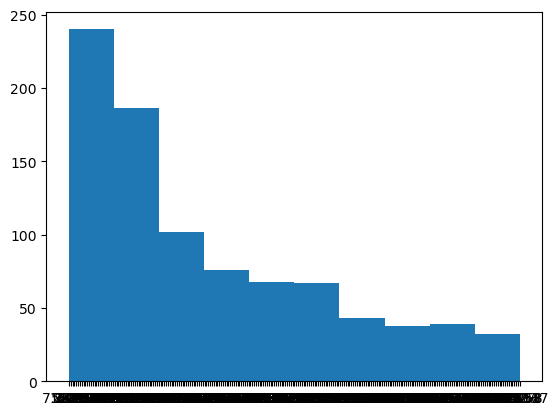

In [342]:
plt.hist(data.Fare)

**Diagrama de Dispersión**

<Axes: xlabel='PassengerId', ylabel='Age'>

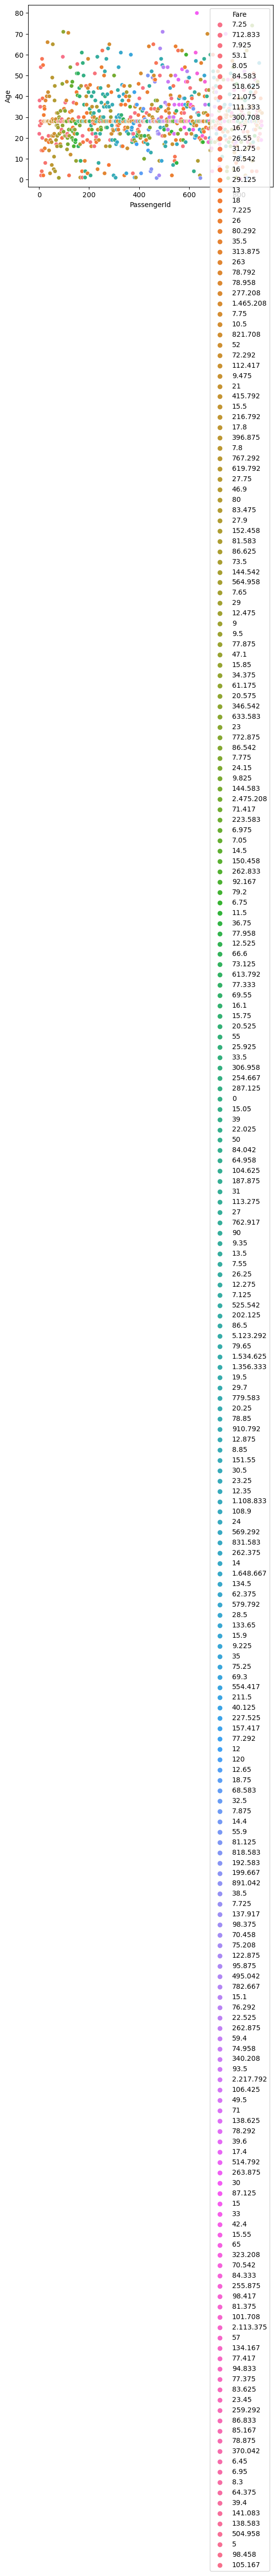

In [307]:
sns.scatterplot(x="PassengerId", y="Age", hue ="Fare", data=data)

In [308]:
predictors_col = ["PassengerId","Survived","Pclass","Age","SibSp","Parch"]
target_col=['Fare']

In [309]:
predictors = data[predictors_col]
target = data[target_col]

In [310]:
predictors

,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,1,0,3,22.0,1,0
1,2,1,1,38.0,1,0
2,3,1,3,26.0,0,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,0
...,...,...,...,...,...,...
886,887,0,2,27.0,0,0
887,888,1,1,19.0,0,0
888,889,0,3,28.0,1,2
889,890,1,1,26.0,0,0


In [311]:
target

,Fare
0,7.25
1,712.833
2,7.925
3,53.1
4,8.05
...,...
886,13
887,30
888,23.45
889,30


**Correlación entre variables predictoras**

In [312]:
print("Valores cercanos a 1, tienen alta correlación directa")
print ("Valores cercanos a -1, tienen alta correlación inversa")
print("Valores cercanos a cero 0, tienen baja o nula correlación ")

Valores cercanos a 1, tienen alta correlación directa
Valores cercanos a -1, tienen alta correlación inversa
Valores cercanos a cero 0, tienen baja o nula correlación 


In [313]:
corr = predictors.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000


**Mapa de calor**

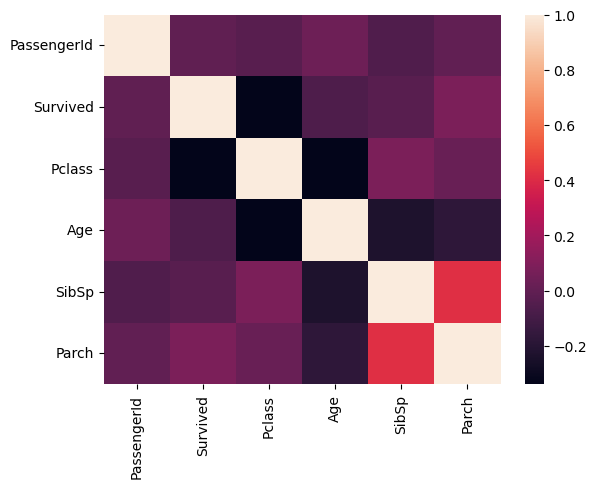

In [314]:
sns.heatmap(corr)
plt.show()

In [315]:
x_train, x_test, y_train,y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [316]:
tree=DecisionTreeClassifier()

In [317]:
arbol = tree.fit(x_train, y_train)

[Text(0.579006456993372, 0.9791666666666666, 'x[2] <= 2.5\ngini = 0.984\nsamples = 712\nvalue = [13, 4, 2, 1, 3, 2, 19, 2, 1, 1, 2, 3, 2, 2\n1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 37, 2, 2, 1\n1, 1, 1, 1, 2, 7, 7, 2, 1, 1, 7, 1, 1, 2\n2, 2, 4, 1, 1, 7, 1, 2, 2, 2, 2, 2, 3, 2\n3, 1, 1, 1, 2, 2, 1, 4, 4, 1, 1, 1, 2, 3\n2, 2, 1, 7, 4, 1, 2, 29, 5, 15, 2, 3, 4, 1\n2, 2, 5, 4, 1, 1, 2, 4, 2, 5, 3, 2, 2, 2\n5, 3, 1, 3, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1\n2, 6, 2, 1, 1, 4, 1, 1, 2, 1, 3, 1, 1, 2\n7, 2, 5, 2, 2, 1, 6, 2, 2, 1, 1, 2, 2, 1\n1, 1, 1, 1, 1, 1, 1, 2, 1, 7, 5, 2, 10, 10\n2, 3, 1, 26, 12, 1, 13, 1, 1, 12, 1, 5, 2, 1\n1, 1, 1, 2, 2, 2, 1, 5, 2, 2, 2, 12, 3, 1\n32, 2, 4, 3, 30, 1, 1, 2, 1, 1, 1, 1, 2, 2\n1, 3, 1, 1, 1, 2, 1, 13, 1, 1, 2, 2, 2, 2\n1, 6, 2, 4, 1, 2, 1, 2, 1, 1, 1]'),
 Text(0.29732603273359115, 0.9375, 'x[2] <= 1.5\ngini = 0.968\nsamples = 327\nvalue = [9, 4, 2, 1, 3, 2, 19, 0, 0, 1, 2, 3, 0, 0\n1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 37, 2, 2, 0\n1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0\n0, 2, 0

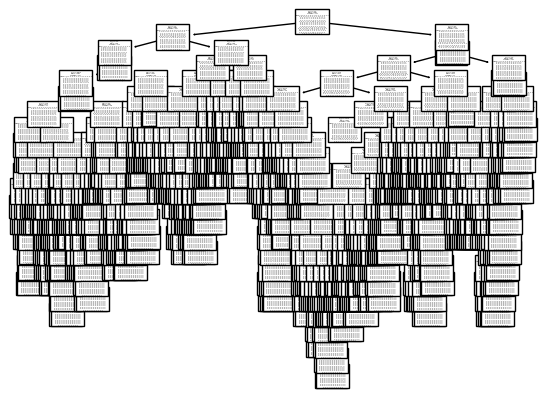

In [318]:
plot_tree(arbol)

In [354]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [357]:
y_pred = model.predict(x_test)

In [358]:
y_pred

array(['27.9', '7.25', '17.8', '564.958', '78.958', '1.648.667', '7.75',
       '9', '564.958', '7.25', '78.958', '26', '65', '24.15', '78.958',
       '13', '79.65', '13', '26.25', '21.075', '223.583', '23', '77.958',
       '16.1', '8.05', '13', '78.958', '78.958', '144.542', '26',
       '72.292', '16.1', '20.25', '78.958', '72.292', '13', '7.25',
       '199.667', '14.5', '13', '1.108.833', '78.958', '17.8', '277.208',
       '9.5', '26.25', '13', '8.05', '23.45', '7.225', '78.958',
       '569.292', '86.625', '26', '78.958', '415.792', '14.4', '13',
       '27.9', '1.534.625', '26', '15.5', '78.542', '27.9', '78.958',
       '13', '15.9', '13', '23.25', '138.583', '144.542', '26', '14.5',
       '7.65', '26', '26.25', '0', '14.5', '16.1', '26.55', '144.542',
       '86.542', '9.35', '19.5', '14.5', '78.958', '46.9', '120', '7.225',
       '84.583', '1.534.625', '26.55', '26', '525.542', '13', '120', '13',
       '12.875', '14.5', '78.958', '144.542', '8.05', '27.9', '21.075',
    

In [359]:
predicciones = arbol.predict(x_test)

In [360]:
predicciones

array(['27.9', '7.25', '17.8', '564.958', '564.958', '1.648.667',
       '12.475', '78.958', '564.958', '7.25', '7.775', '26', '65',
       '24.15', '74.958', '13', '55', '13', '26.25', '27.9', '9.475',
       '23', '78.958', '9.225', '7.55', '26', '78.958', '78.958', '15.5',
       '138.583', '72.292', '15.5', '15.5', '78.958', '78.542', '26',
       '8.05', '199.667', '14.5', '15', '1.108.833', '78.958', '202.125',
       '277.208', '7.775', '26.25', '10.5', '8.05', '23.45', '7.225',
       '8.05', '79.2', '92.167', '26', '8.05', '415.792', '14.4', '26',
       '27.9', '1.534.625', '27.75', '15.55', '81.125', '34.375',
       '78.958', '13', '15.9', '13', '254.667', '138.583', '9.475', '26',
       '8.05', '7.65', '26', '26.25', '0', '14.5', '16.1', '26.55',
       '9.475', '86.542', '9.35', '26', '26.25', '78.958', '46.9', '263',
       '86.625', '84.583', '613.792', '323.208', '26', '263', '10.5',
       '93.5', '13', '12.875', '14.5', '9.225', '157.417', '8.05',
       '31.275', '

In [361]:
#Examinamos la matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]),predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1.108.833,1.534.625,1.648.667,10.5,105.167,108.9,12.35,12.475,12.875,...,86.542,86.625,891.042,9.225,9.35,9.475,9.5,9.825,92.167,93.5
Actual,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.356.333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.465.208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.5,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
101.708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81.375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84.333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
86.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [362]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.1005586592178771